In [1]:
import numpy as np
np.random.seed(321)

## Generating Data

In [2]:
import math
import matplotlib.pyplot as plt

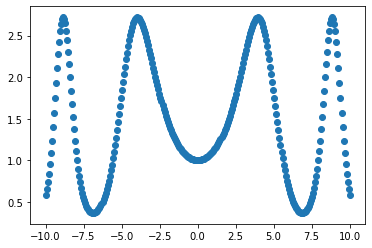

In [3]:
X = np.linspace(-10, 10, 300)
np.random.shuffle(X)
# Random equation
y = np.exp(np.sin((X ** 2) / 10))  

plt.scatter(X, y)

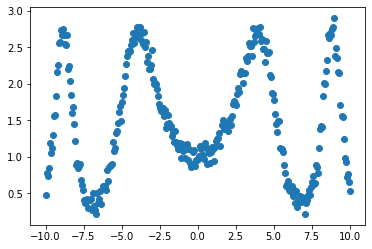

In [4]:
#  Add some noises to make it  more  realistic
y += np.random.normal(0, .1, (300, ))

plt.scatter(X, y)

In [5]:
#  Split data into training data and test data
train_size = math.floor(len(X) * 3/4)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print("Original Data Size: {}".format(len(X)))
print("Train Data Size: {}".format(len(X_train)))
print("Test Data Size: {}".format(len(X_test)))

Original Data Size: 300
Train Data Size: 225
Test Data Size: 75


## Build Model

In [6]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [7]:
model = models.Sequential()
model.add(layers.Dense(input_dim=1, output_dim=32, activation='relu'))
model.add(layers.Dense(output_dim=32, activation='relu'))
model.add(layers.Dense(output_dim=32, activation='relu'))
model.add(layers.Dense(output_dim=1))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=32)`
  
C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  after removing the cwd from sys.path.
C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  """


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam')

## Training and Show Results

In [10]:
prediction = []
for step in range(3001):
    model.train_on_batch(X_train, y_train)

    if(step % 100 == 0):
        print("Step: {}".format(step))
        test_predict = model.predict(sorted(X_test))
        prediction.append(test_predict)

Instructions for updating:
Use tf.cast instead.
Step: 0
Step: 100
Step: 200
Step: 300
Step: 400
Step: 500
Step: 600
Step: 700
Step: 800
Step: 900
Step: 1000
Step: 1100
Step: 1200
Step: 1300
Step: 1400
Step: 1500
Step: 1600
Step: 1700
Step: 1800
Step: 1900
Step: 2000
Step: 2100
Step: 2200
Step: 2300
Step: 2400
Step: 2500
Step: 2600
Step: 2700
Step: 2800
Step: 2900
Step: 3000


In [11]:
from ipywidgets import interact

def show(step=0):
    plt.scatter(X, y, label="Ground Truth")
    plt.plot(sorted(X_test), prediction[step], color='r', label="Prediction")
    plt.legend()

interact(show, step=(0, len(prediction)-1, 1))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.show(step=0)>